In [1]:
import h5py
import os
import numpy as np
from PIL import Image
import scipy

In [2]:
def get_files(file_dir):
    images=[]
    infrareds=[]
    depths=[]
    for file in os.listdir(file_dir+'/2d_finish/'):
        images.append(file_dir+'/2d_finish/'+file)
    for file in os.listdir(file_dir+'/ir_finish/'):
        infrareds.append(file_dir+'/ir_finish/'+file)
    for file in os.listdir(file_dir+'/depth_complete/seq01/'):
        depths.append(file_dir+'/depth_complete/seq01/'+file)
    images_list=np.hstack((images))
    infrareds_list=np.hstack((infrareds))
    depths_list=np.hstack((depths))
    return images_list,infrareds_list,depths_list    

def np_pic(images_list,infrareds_list,depths_list):
    Train_image =  np.random.rand(len(images_list), 256, 512, 3).astype('float32')
    Train_infrared =  np.random.rand(len(infrareds_list), 256, 512, 3).astype('float32')
    Train_depth =  np.random.rand(len(depths_list), 256, 512).astype('float32')
    for i in range(len(infrareds_list)):        
        Train_image[i] = np.array(Image.open(images_list[i]))
        Train_image[i] = Train_image[i]/255
        Train_infrared[i] = np.array(Image.open(infrareds_list[i]))
        Train_infrared[i] = Train_infrared[i]/255
        Train_depth[i] = np.array(Image.open(depths_list[i]))
        Train_depth[i] = np.floor((Train_depth[i]-np.min(Train_depth[i]))/(np.max(Train_depth[i])-np.min(Train_depth[i])+1)*32)
    return Train_image,Train_infrared,Train_depth

def write(file_name,Train_image,Train_infrared, Train_depth):
    with h5py.File(file_name, 'w') as f:
        f.create_dataset('images',data=Train_image)
        f.create_dataset('infrareds',data=Train_infrared)
        f.create_dataset('depths',data=Train_depth)

In [3]:
train_dir='D:/剪裁好的数据'
images_list,infrareds_list,depths_list=get_files(train_dir)
#infrareds_list,depths_list=get_files(train_dir)

In [4]:
depths_list.shape

(12,)

In [7]:
index=np.arange(infrareds_list.shape[0])
np.random.shuffle(index)
print(index)

[  31 3217 3732 ... 2693 4604 1387]


In [8]:
infrareds_list=infrareds_list[index]
infrareds_list

array(['C:/complete/infrareds/seq01/IR_01263038.jpg',
       'C:/complete/infrareds/seq01/IR_01281097.jpg',
       'C:/complete/infrareds/seq01/IR_01283982.jpg', ...,
       'C:/complete/infrareds/seq01/IR_01278169.jpg',
       'C:/complete/infrareds/seq01/IR_01290010.jpg',
       'C:/complete/infrareds/seq01/IR_01270818.jpg'], dtype='<U43')

In [5]:
#depths_list=depths_list[index]
depths_list

array(['D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100525.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100530.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100536.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100541.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100546.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100551.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100557.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100562.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100567.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100572.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100577.png',
       'D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100583.png'],
      dtype='<U58')

In [10]:
images_list=images_list[index]
images_list

array(['C:/complete/images/seq01/RGB_01263038.jpg',
       'C:/complete/images/seq01/RGB_01281097.jpg',
       'C:/complete/images/seq01/RGB_01283982.jpg', ...,
       'C:/complete/images/seq01/RGB_01278169.jpg',
       'C:/complete/images/seq01/RGB_01290010.jpg',
       'C:/complete/images/seq01/RGB_01270818.jpg'], dtype='<U41')

In [6]:
print(depths_list[6])

D:/剪裁好的数据/depth_complete/seq01/depth_complete_00100557.png


In [7]:
image_list=images_list[6:7]
infrared_list=infrareds_list[6:7]
depth_list=depths_list[6:7]

In [8]:
Train_image,Train_infrared,Train_depth=np_pic(image_list,infrared_list,depth_list)

In [9]:
write('3.h5',Train_image,Train_infrared, Train_depth)

In [10]:
def read_hdf5(file_name):
    with h5py.File(file_name, 'r') as f:
        images = np.asarray(f['images'])
        infrareds = np.asarray(f['infrareds'])
        depths = np.asarray(f['depths'])
    return images,infrareds, depths

In [11]:
images,infrareds, depths = read_hdf5('3.h5')

In [12]:
import matplotlib.pyplot as plt

In [13]:
a=depths[0]
a

array([[ 13.,  13.,  13., ...,   7.,   7.,   7.],
       [ 13.,  13.,  13., ...,   7.,   7.,   7.],
       [ 13.,  13.,  13., ...,   7.,   7.,   7.],
       ..., 
       [  2.,   2.,   2., ...,   0.,   0.,   0.],
       [  2.,   2.,   2., ...,   0.,   0.,   0.],
       [  2.,   2.,   2., ...,   0.,   0.,   0.]], dtype=float32)

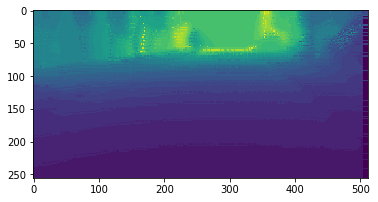

In [15]:
plt.imshow(a)
plt.imsave('分类后的深度图.png',a)
plt.show()

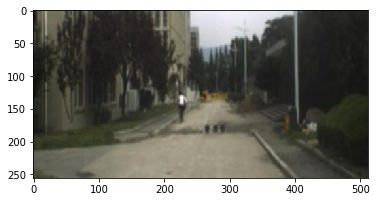

array([[[ 0.12941177,  0.12941177,  0.13725491],
        [ 0.14117648,  0.14117648,  0.14117648],
        [ 0.14117648,  0.13725491,  0.12156863],
        ..., 
        [ 0.13333334,  0.13333334,  0.1254902 ],
        [ 0.13333334,  0.13333334,  0.1254902 ],
        [ 0.13333334,  0.13333334,  0.1254902 ]],

       [[ 0.13333334,  0.13333334,  0.14117648],
        [ 0.14509805,  0.14509805,  0.14509805],
        [ 0.14509805,  0.14117648,  0.1254902 ],
        ..., 
        [ 0.13333334,  0.13333334,  0.1254902 ],
        [ 0.13333334,  0.13333334,  0.1254902 ],
        [ 0.13333334,  0.13333334,  0.1254902 ]],

       [[ 0.14117648,  0.14117648,  0.14901961],
        [ 0.15294118,  0.15294118,  0.15294118],
        [ 0.14901961,  0.14509805,  0.12941177],
        ..., 
        [ 0.13333334,  0.13333334,  0.1254902 ],
        [ 0.13333334,  0.13333334,  0.1254902 ],
        [ 0.13333334,  0.13333334,  0.1254902 ]],

       ..., 
       [[ 0.28235295,  0.29803923,  0.16078432],
        

In [17]:
b=images[0]
plt.imshow(b)
plt.show()
b

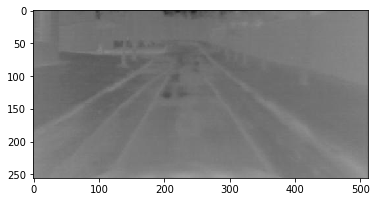

array([[[0.44313726, 0.44313726, 0.44313726],
        [0.44705883, 0.44705883, 0.44705883],
        [0.4509804 , 0.4509804 , 0.4509804 ],
        ...,
        [0.5058824 , 0.5058824 , 0.5058824 ],
        [0.49803922, 0.49803922, 0.49803922],
        [0.49019608, 0.49019608, 0.49019608]],

       [[0.44313726, 0.44313726, 0.44313726],
        [0.44705883, 0.44705883, 0.44705883],
        [0.4509804 , 0.4509804 , 0.4509804 ],
        ...,
        [0.5058824 , 0.5058824 , 0.5058824 ],
        [0.49411765, 0.49411765, 0.49411765],
        [0.49019608, 0.49019608, 0.49019608]],

       [[0.44313726, 0.44313726, 0.44313726],
        [0.44705883, 0.44705883, 0.44705883],
        [0.4509804 , 0.4509804 , 0.4509804 ],
        ...,
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.49019608, 0.49019608, 0.49019608],
        [0.4862745 , 0.4862745 , 0.4862745 ]],

       ...,

       [[0.5411765 , 0.5411765 , 0.5411765 ],
        [0.5411765 , 0.5411765 , 0.5411765 ],
        [0.5411765 , 0

In [52]:
c=infrareds[0]
plt.imshow(c)
plt.show()
c